In [1]:
# Advanced Data Mining - Project Deliverable 1
# Dataset: Wine Quality (Red)
# Goal: Data collection, cleaning, and exploratory data analysis (EDA)

In [2]:
# ------------------------------
# 1. Import Libraries
# ------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Set Seaborn style for plots
sns.set(style="whitegrid")

# Display all columns in output
pd.set_option('display.max_columns', None)

In [3]:
# ------------------------------
# 2. Load Dataset
# ------------------------------

# Load the wine quality dataset (red wine)
df = pd.read_csv('winequality-red.csv', sep=';')

# Inspect first 5 rows
display(df.head())

# Display basic info: data types, non-null counts
df.info()

# Show summary statistics for numeric columns
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# ------------------------------
# 3. Data Cleaning
# ------------------------------

# 3.1 Handle Missing Values
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Explanation: There are no missing values in this dataset, so no imputation is needed.

# 3.2 Remove Duplicates
# Count duplicate rows
num_dups = df.duplicated().sum()
print(f"Number of duplicate rows: {num_dups}")

# Drop duplicate rows
df = df.drop_duplicates()
print(f"New dataset shape after removing duplicates: {df.shape}")

# Explanation: Removing duplicates ensures each observation is unique to prevent bias in analysis.

# 3.3 Identify Outliers using Z-score
# Calculate Z-scores for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
z_scores = np.abs(stats.zscore(df[numeric_cols]))

# Boolean mask for rows where all z-scores < 3
mask = (z_scores < 3).all(axis=1)
df_clean = df[mask]
print(f"Rows before outlier filtering: {df.shape[0]}")
print(f"Rows after outlier filtering: {df_clean.shape[0]}")

# Explanation: Outliers can skew statistical analysis. Z-score filtering removes extreme values.


Missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Number of duplicate rows: 240
New dataset shape after removing duplicates: (1359, 12)
Rows before outlier filtering: 1359
Rows after outlier filtering: 1232


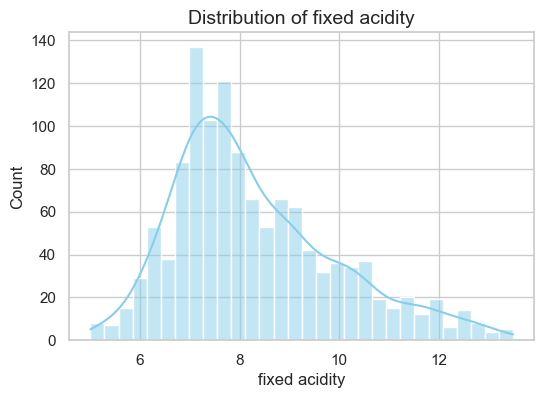

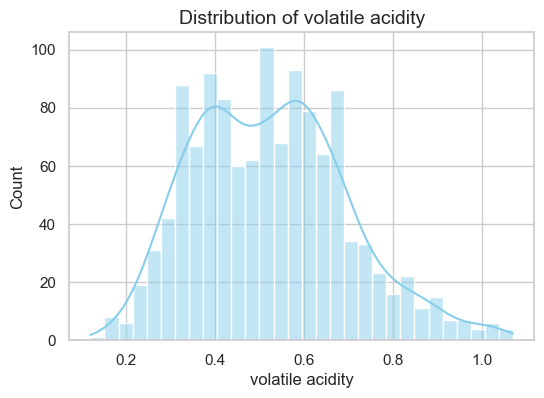

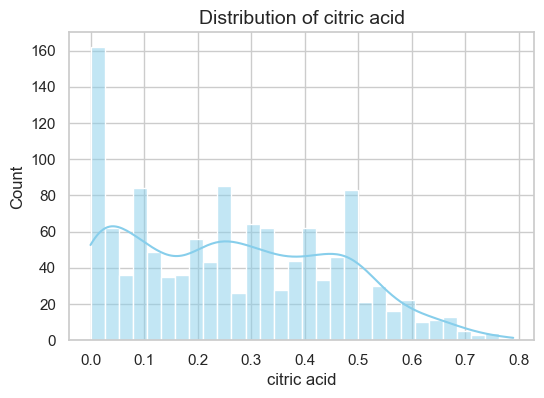

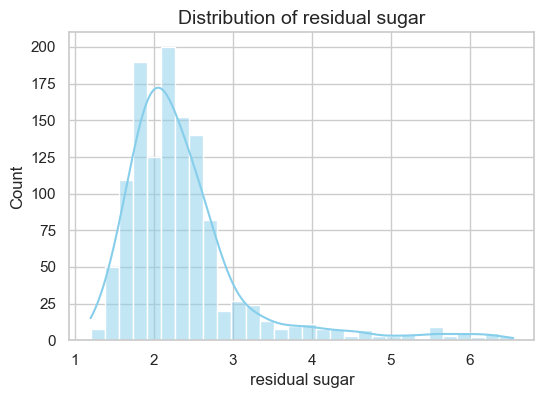

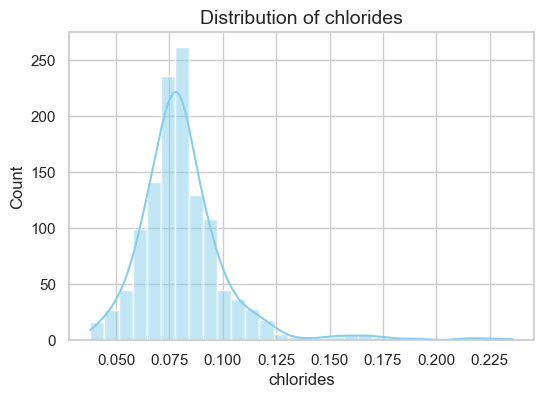

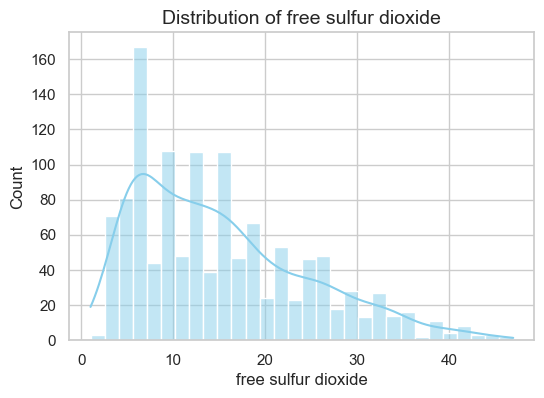

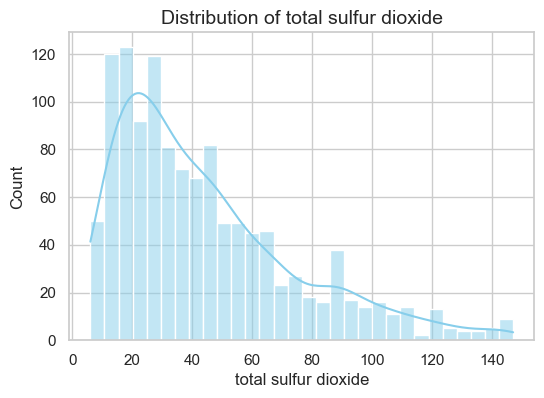

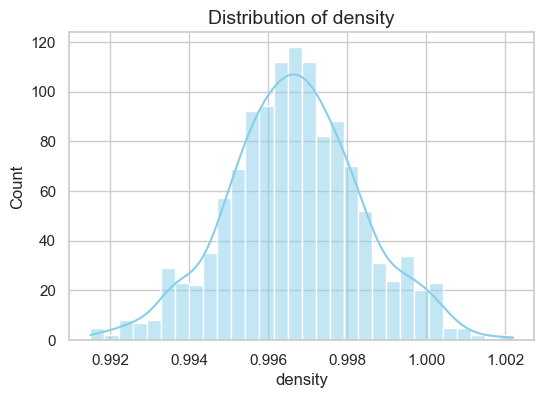

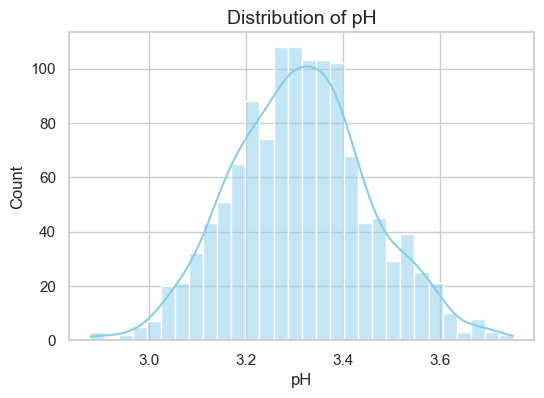

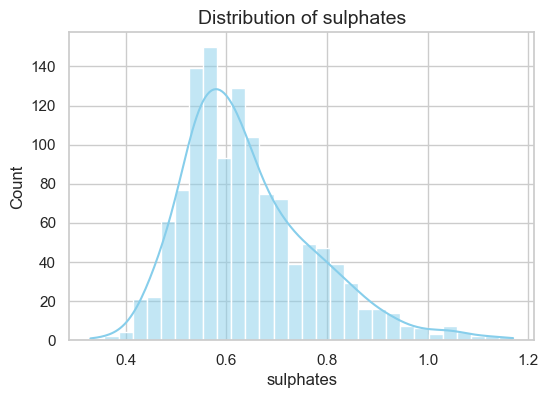

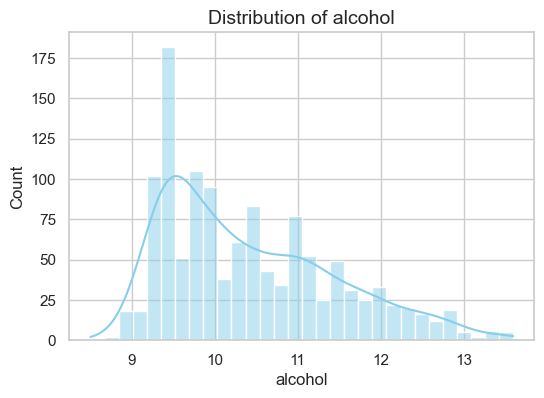

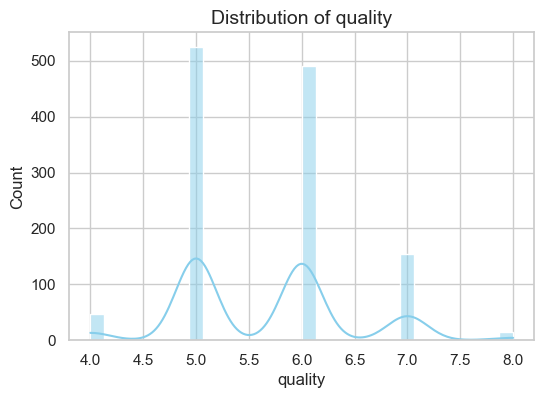

In [5]:
# ------------------------------
# 4. Exploratory Data Analysis (EDA)
# ------------------------------

# 4.1 Distribution of Numeric Features
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_clean[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
    # Explanation: Visualizing distributions helps identify skewness, spread, and potential anomalies.

C:\Users\shaha\AppData\Local\Temp\ipykernel_36740\2053832216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=feature, data=df_clean, palette='Set2')


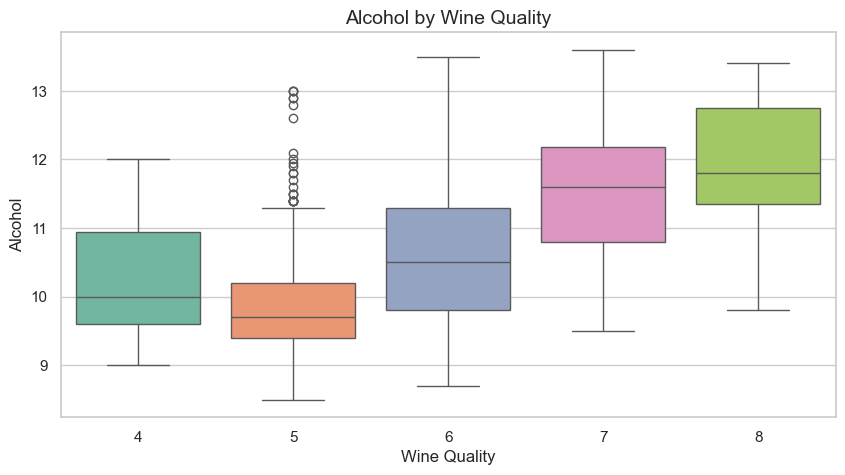

C:\Users\shaha\AppData\Local\Temp\ipykernel_36740\2053832216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=feature, data=df_clean, palette='Set2')


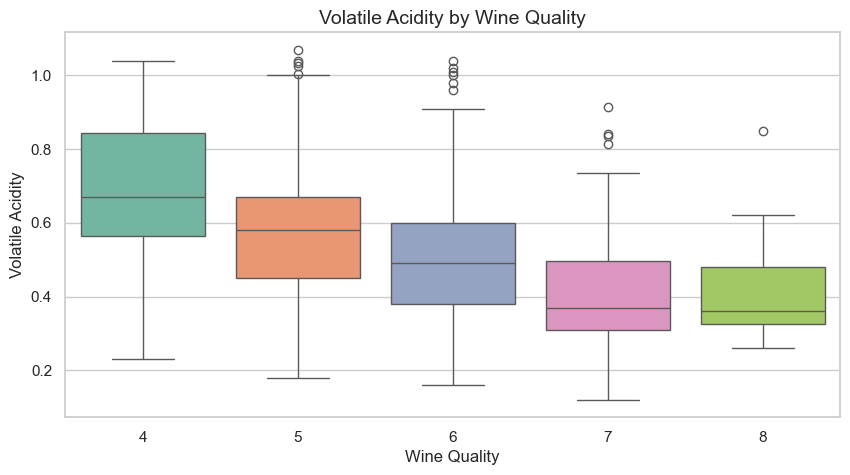

C:\Users\shaha\AppData\Local\Temp\ipykernel_36740\2053832216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=feature, data=df_clean, palette='Set2')


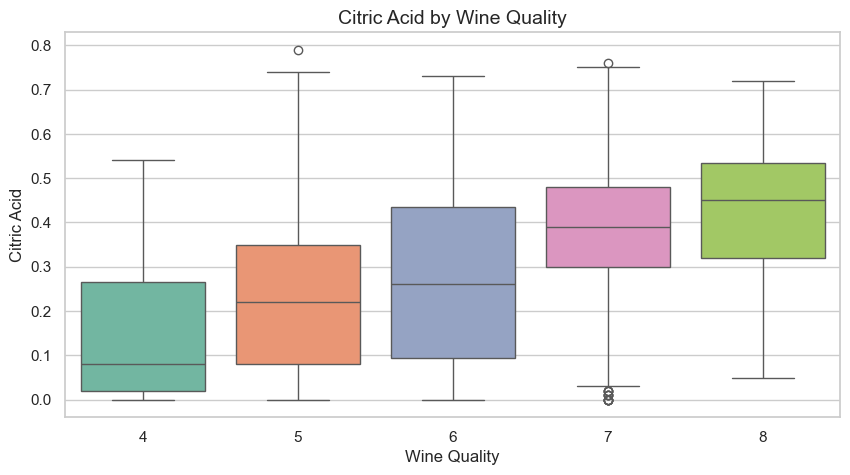

C:\Users\shaha\AppData\Local\Temp\ipykernel_36740\2053832216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=feature, data=df_clean, palette='Set2')


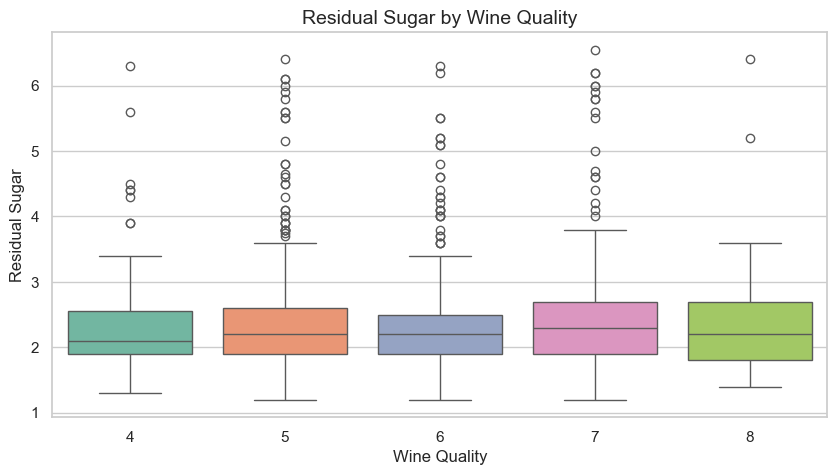

In [6]:
# 4.2 Boxplots to Explore Outliers by Wine Quality
features_to_box = ['alcohol', 'volatile acidity', 'citric acid', 'residual sugar']

for feature in features_to_box:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='quality', y=feature, data=df_clean, palette='Set2')
    plt.title(f'{feature.title()} by Wine Quality', fontsize=14)
    plt.xlabel('Wine Quality')
    plt.ylabel(feature.title())
    plt.show()
    # Explanation: Boxplots reveal distribution of features across quality levels and highlight outliers.

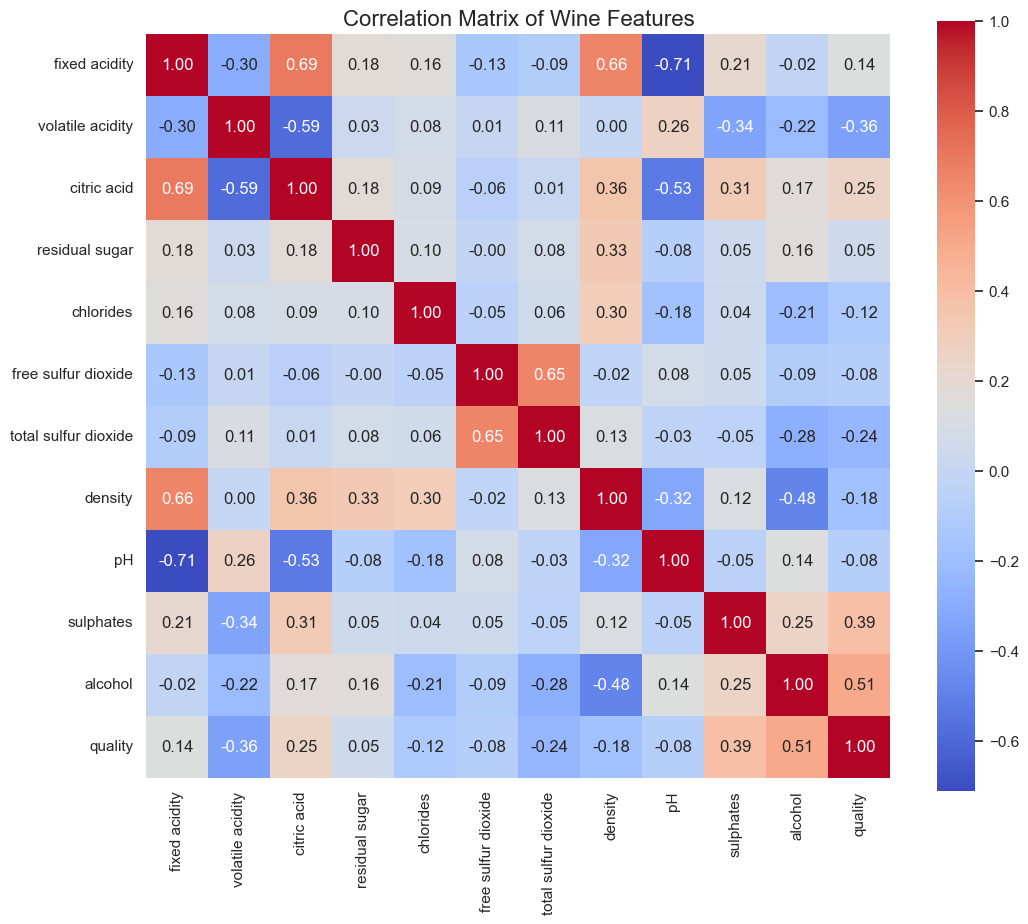

In [7]:
# 4.3 Correlation Heatmap
plt.figure(figsize=(12,10))
corr_matrix = df_clean.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Wine Features', fontsize=16)
plt.show()
# Explanation: Correlation helps identify which features are most related to wine quality and informs feature selection for modeling.

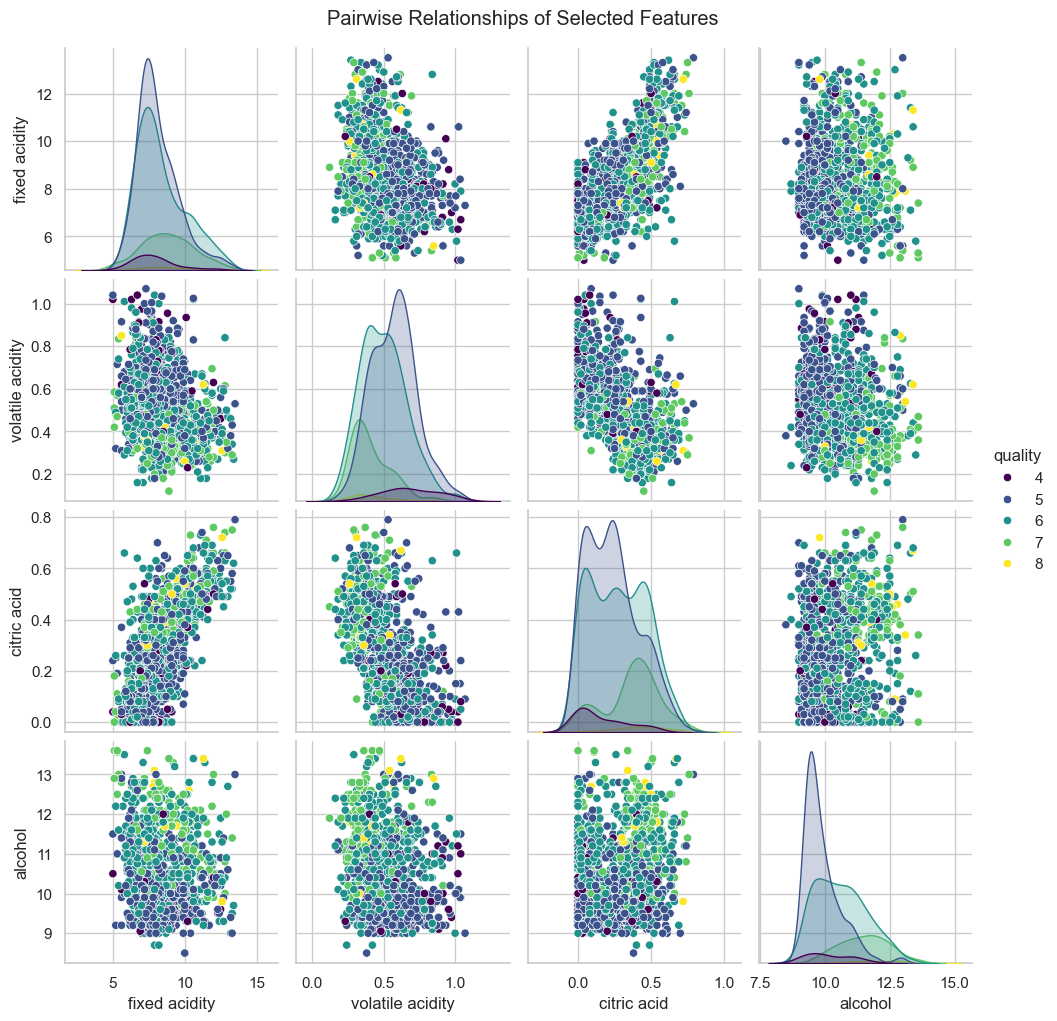

In [8]:
# 4.4 Pairplot (Scatterplot Matrix) for Key Features
subset_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'alcohol', 'quality']
sns.pairplot(df_clean[subset_features], hue='quality', palette='viridis')
plt.suptitle('Pairwise Relationships of Selected Features', y=1.02)
plt.show()
# Explanation: Pairplots help visualize interactions between variables and their influence on the target (quality).

In [9]:
# ------------------------------
# 5. Summary of Insights
# ------------------------------

# Insights from EDA:
# 1. No missing values exist; dataset is mostly clean.
# 2. Duplicates were removed to ensure unique observations.
# 3. Outlier removal reduced extreme values that could distort models.
# 4. Distributions:
#    - Alcohol shows a roughly normal distribution, positively correlated with quality.
#    - Residual sugar is right-skewed.
# 5. Correlations:
#    - Alcohol positively correlated with quality.
#    - Volatile acidity negatively correlated with quality.
#    - Strong correlation between free sulfur dioxide and total sulfur dioxide.
# 6. Pairwise analysis indicates higher citric acid and alcohol levels are associated with higher quality.
#
# Implications for modeling:
# - Features like alcohol and volatile acidity are strong predictors.
# - Skewed features may require scaling or transformation.
# - Consider regression for continuous quality scores or classification after grouping quality levels.
